# CardioIA – Classificador de Risco (TF‑IDF + Logistic Regression)

Acurácia: 0.8
              precision    recall  f1-score   support

  alto risco       0.80      0.80      0.80         5
 baixo risco       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10



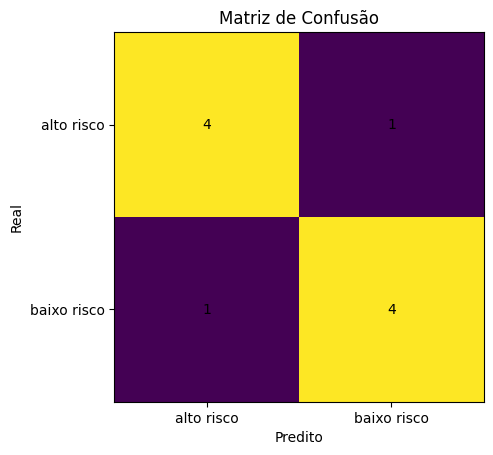

[('dor no peito com falta de ar', 'alto risco'), ('incômodo leve nas costas após treino', 'baixo risco'), ('aperto no tórax e suor frio', 'alto risco')]


In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

df = pd.read_csv("../data/risk_dataset.csv")
X_train, X_test, y_train, y_test = train_test_split(df["frase"], df["situacao"], test_size=0.25, random_state=42, stratify=df["situacao"])

vec = TfidfVectorizer(ngram_range=(1,2), min_df=1)
Xtr = vec.fit_transform(X_train)
Xte = vec.transform(X_test)

clf = LogisticRegression(max_iter=200)
clf.fit(Xtr, y_train)
preds = clf.predict(Xte)

acc = accuracy_score(y_test, preds)
print("Acurácia:", round(acc, 3))
print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds, labels=["alto risco","baixo risco"])

plt.figure()
plt.imshow(cm, interpolation='nearest')
plt.title("Matriz de Confusão")
plt.xticks([0,1], ["alto risco","baixo risco"])
plt.yticks([0,1], ["alto risco","baixo risco"])
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

# Testes manuais
exemplos = [
    "dor no peito com falta de ar",
    "incômodo leve nas costas após treino",
    "aperto no tórax e suor frio"
]
Xex = vec.transform(exemplos)
print(list(zip(exemplos, clf.predict(Xex))))
